### Исследование предложений по аренде недвижимости в Москве

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/_data.csv')

При исследовании предоставленных дата-инженерами данных, помимо московских, обнаружились объявления из других городов и регионов. 

Всего из 23368 предложений в Москве выставлено 19737 объектов недвижимости.

Распределение предложений представлено на графике.

In [3]:
#Делаем выборку для каждого города, с помощью метода, который нагуглили. 
# Думал, что такой точно есть, но не знал наверняка. Изначально думал писать через regex
moscow = df[df['Адрес'].str.startswith('Москва', na=False)].reset_index()
spb = df[df['Адрес'].str.startswith('Санкт-Петербург', na=False)].reset_index()
krasnodar = df[df['Адрес'].str.startswith('Краснодарский край', na=False)].reset_index()

#Считаем в словаре, можно было бы сделать зипом, но так удобнее и нагляднее
count = pd.DataFrame({
    'Город': ['Москва', 'Санкт-Петербург', 'Краснодарский край'],
    'Количество': [moscow.index.max(), spb.index.max(), krasnodar.index.max()]
})

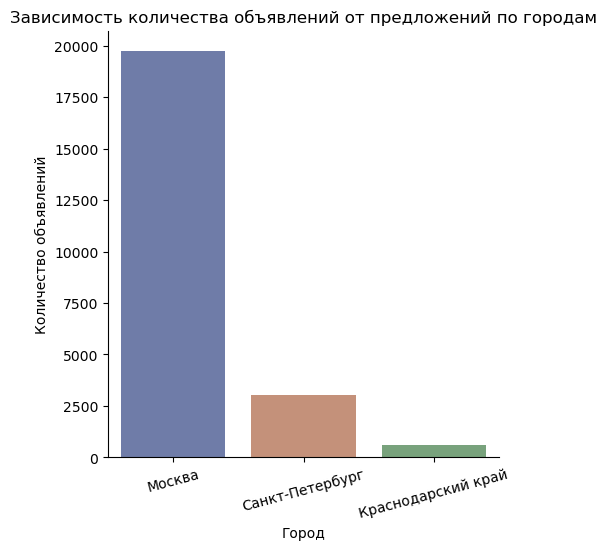

In [4]:
#Строим график
#P.S. Хорошо бы сюда добавить числовое отображение для каждого из столбцов, но я пока не знаю как... Предполагаю, что через цикл.
# plt.figure(figsize=(10, 8));
graf1 = sns.catplot(data=count, x='Город', y='Количество', kind='bar', hue='Город', errorbar="sd", palette="dark", alpha=.6);
graf1.set_ylabels('Количество объявлений')
graf1.set_xlabels('Город')
graf1.set_xticklabels(rotation=15)
plt.title('Зависимость количества объявлений от предложений по городам');


Поскольку в качестве пилотной локации выбрана Москва, все представленные далее графики будут отражать ситуацию только на московском рынке.

Число предложений, ограниченных разрешением на проживание с животными и/или детьми.

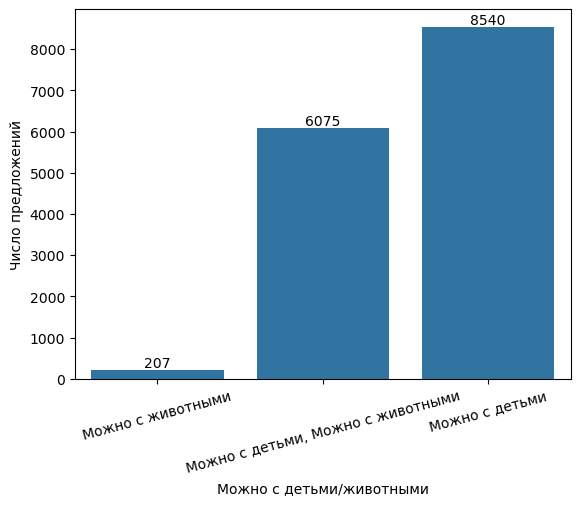

In [5]:
child_and_pet = moscow['Можно с детьми/животными'].value_counts(ascending=True).to_frame()
ax = sns.barplot(data=child_and_pet, x='Можно с детьми/животными', y='count'); 
ax.bar_label(ax.containers[0], fontsize=10);
plt.ylabel(ylabel='Число предложений');
plt.xticks(rotation=15);

Распределение предложений по наличию парковочных мест и их расположениям.

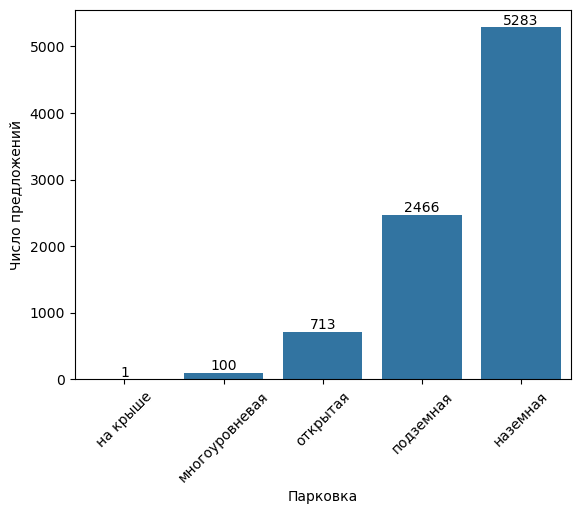

In [6]:
car = moscow['Парковка'].value_counts(ascending=True).to_frame()
ax = sns.barplot(data=car, x='Парковка', y='count'); 
ax.bar_label(ax.containers[0], fontsize=10);
plt.ylabel(ylabel='Число предложений');
plt.xticks(rotation=45);

Распределение предложений по наличию мусоропровода в доме.

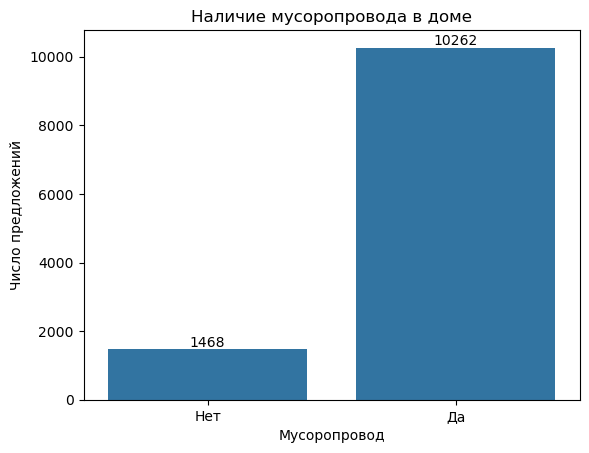

In [7]:
garbage_chute = moscow['Мусоропровод'].value_counts(ascending=True).to_frame()
ax = sns.barplot(data=garbage_chute, x='Мусоропровод', y='count');
ax.bar_label(ax.containers[0], fontsize=10);
plt.title(label='Наличие мусоропровода в доме')
plt.ylabel(ylabel='Число предложений');

Распределение предложений по видам из окон.

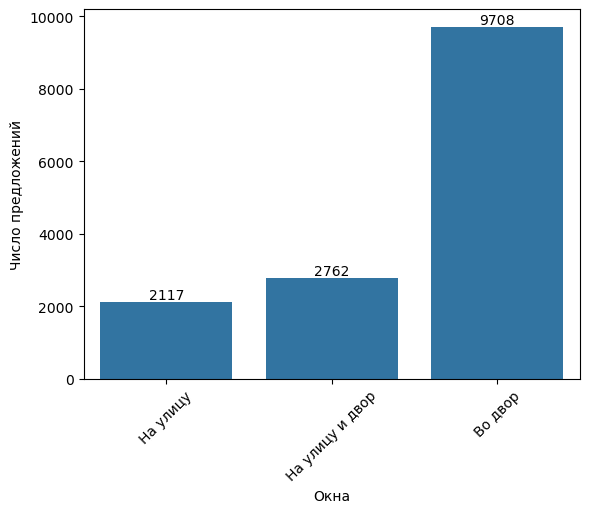

In [8]:
window = moscow['Окна'].value_counts(ascending=True).to_frame()
ax = sns.barplot(data=window, x='Окна', y='count'); 
ax.bar_label(ax.containers[0], fontsize=10);
plt.ylabel(ylabel='Число предложений');
plt.xticks(rotation=45);

Распределение числа предложений по категориям ремонта.

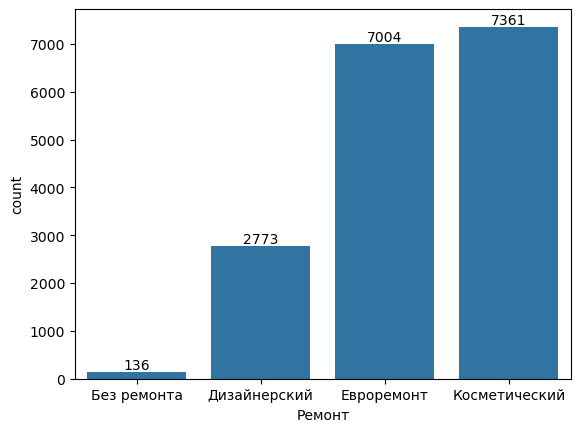

In [9]:
apartment_renovation = moscow['Ремонт'].value_counts(ascending=True).to_frame()
ax = sns.barplot(data=apartment_renovation, x='Ремонт', y='count');
ax.bar_label(ax.containers[0], fontsize=10);

Следующий график иллюстрирует преобладающую высоту потолка в категории ремонта.

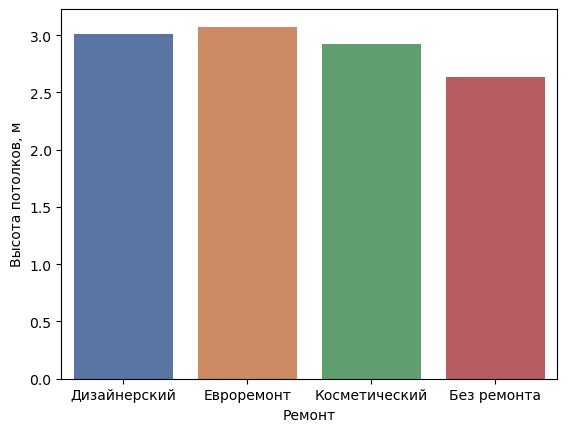

In [10]:
sns.barplot(data=moscow, x='Ремонт', y='Высота потолков, м', hue='Ремонт', errorbar=None, palette='deep', legend=False);